# Advanced Methods in Clustring

In [2]:
import pandas as pd
from google.colab import drive
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score


## Importing Dataset

In [3]:
drive.mount('/content/gdrive')
data = pd.read_csv('gdrive/My Drive/buntyshahauto-insurance-claims-data.csv')

Mounted at /content/gdrive


## EDA:

In [4]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


## Preprocessing

In [8]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [10]:
if data.duplicated().any():
    print(data.duplicated().sum(),"has duplicate data.")
else:
    print("no duplicate.")

no duplicate.


In [11]:
column_delete = ['_c39', 'policy_number', 'policy_bind_date', 'policy_csl', 'incident_date', 'incident_location',"insured_zip", "insured_hobbies", 'incident_city', 'auto_make', 'auto_model', 'auto_year']
data = data.drop(columns=column_delete)

In [15]:
data.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,?,0,0,?,5070,780,780,3510,Y
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,?,1,2,NO,63400,6340,6340,50720,Y
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [12]:
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

## Clustering

In [13]:
X = data.drop(columns=['fraud_reported'])
y = data['fraud_reported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
y_train_resampled.value_counts()

N    608
Y    608
Name: fraud_reported, dtype: int64

In [14]:
numerical= X.select_dtypes(include='number').columns
categorical= X.select_dtypes(include='object').columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical)
    ])
X_train_encoded = preprocessor.fit_transform(X_train_resampled)
X_test_encoded = preprocessor.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**K-Means**

In [18]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train_encoded)

# Calculate Silhouette Score
kmeans_score = silhouette_score(X_train_encoded, kmeans_labels)

print(f"K-Means Silhouette Score: {kmeans_score}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Silhouette Score: 0.15569078084268953


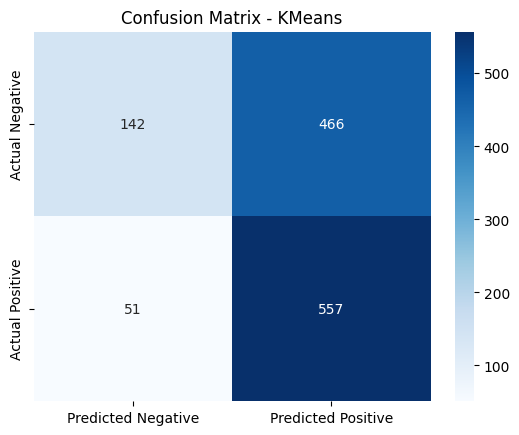

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Y' represents the positive class
kmeans_conf_matrix = confusion_matrix(y_train_resampled.map({'Y': 1, 'N': 0}), kmeans_labels)
sns.heatmap(kmeans_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - KMeans')
plt.show()


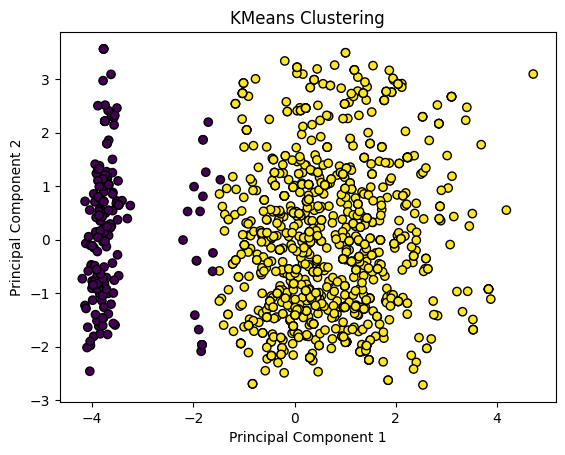

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_encoded)

# Visualize KMeans clusters
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [28]:
y_true_binary = np.where(y_train_resampled == 'Y', 1, 0)
print("K-Means:")
print(classification_report(y_true_binary, kmeans_labels))

K-Means:
              precision    recall  f1-score   support

           0       0.74      0.23      0.35       608
           1       0.54      0.92      0.68       608

    accuracy                           0.57      1216
   macro avg       0.64      0.57      0.52      1216
weighted avg       0.64      0.57      0.52      1216



**Agglonerative Clustering**

In [20]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Create Agglomerative Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_clustering.fit_predict(X_train_encoded)

# Calculate Silhouette Score
agg_score = silhouette_score(X_train_encoded, agg_labels)

print(f"Agglomerative Hierarchical Silhouette Score: {agg_score}")


Agglomerative Hierarchical Silhouette Score: 0.16083819317208767


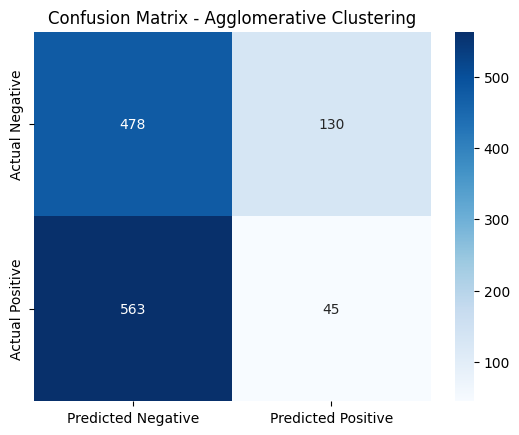

In [25]:
agg_conf_matrix = confusion_matrix(y_train_resampled.map({'Y': 1, 'N': 0}), agg_labels)
sns.heatmap(agg_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Agglomerative Clustering')
plt.show()


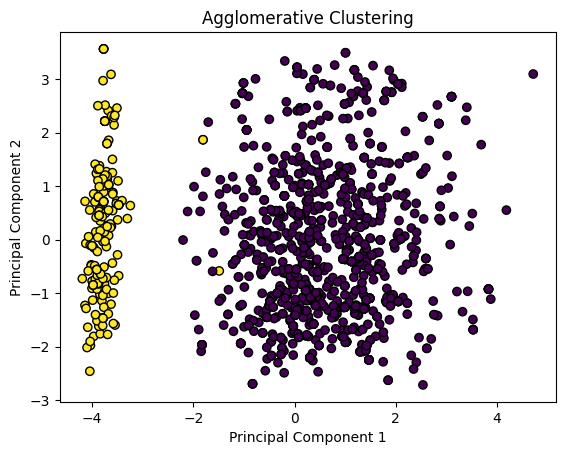

In [21]:
# Apply PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_encoded)

# Visualize Agglomerative Clustering clusters
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=agg_labels, cmap='viridis', edgecolors='k')
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [29]:
y_true_binary = np.where(y_train_resampled == 'Y', 1, 0)
print("Agglomerative Hierarchical:")
print(classification_report(y_true_binary, agg_labels))


Agglomerative Hierarchical:
              precision    recall  f1-score   support

           0       0.46      0.79      0.58       608
           1       0.26      0.07      0.11       608

    accuracy                           0.43      1216
   macro avg       0.36      0.43      0.35      1216
weighted avg       0.36      0.43      0.35      1216



**DB-Scan**

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Create DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_train_encoded)

# Calculate Silhouette Score
dbscan_score = silhouette_score(X_train_encoded, dbscan_labels)

print(f"DBSCAN Silhouette Score: {dbscan_score}")


DBSCAN Silhouette Score: -0.04539766261829971


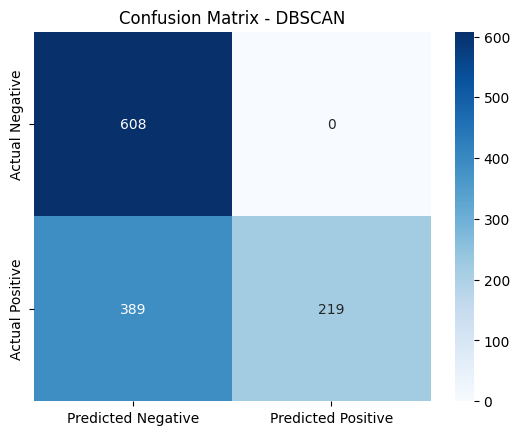

In [26]:
# Assuming 'Y' represents the positive class
dbscan_conf_matrix = confusion_matrix(y_train_resampled.map({'Y': 1, 'N': 0}), np.where(dbscan_labels == -1, 0, 1))
sns.heatmap(dbscan_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - DBSCAN')
plt.show()


<ipython-input-23-ea05327351f3>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train_pca[dbscan_labels == label, 0], X_train_pca[dbscan_labels == label, 1],


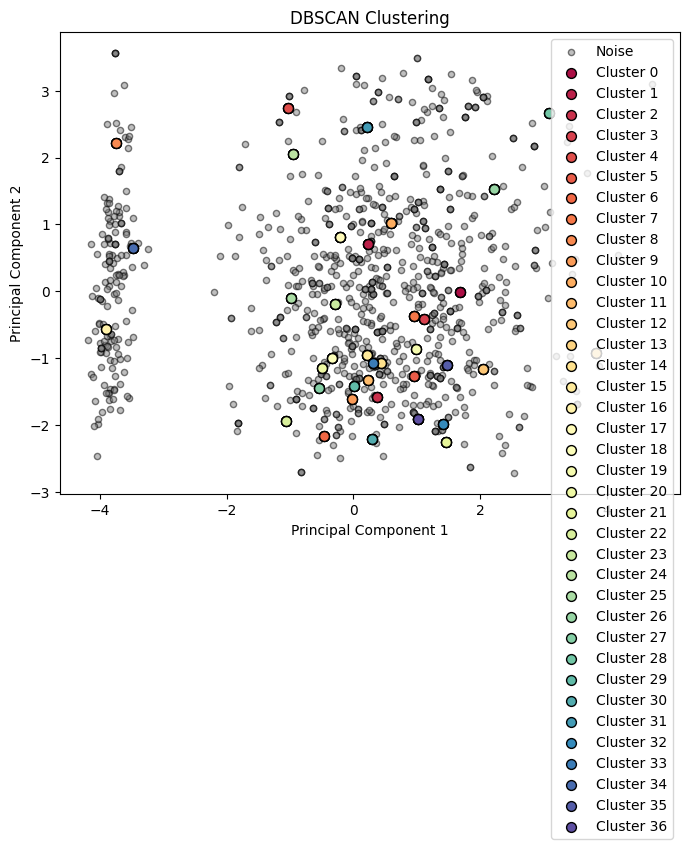

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize DBSCAN clusters with noise
unique_labels = np.unique(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Apply PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_encoded)

plt.figure(figsize=(8, 6))

for label, color in zip(unique_labels, colors):
    if label == -1:
        plt.scatter(X_train_pca[dbscan_labels == label, 0], X_train_pca[dbscan_labels == label, 1],
                    c='gray', edgecolors='k', s=20, alpha=0.5, label='Noise')
    else:
        plt.scatter(X_train_pca[dbscan_labels == label, 0], X_train_pca[dbscan_labels == label, 1],
                    c=color, edgecolors='k', s=50, label=f'Cluster {label}')

plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [30]:
y_true_binary = np.where(y_train_resampled == 'Y', 1, 0)
print(" DBSCAN:")
print(classification_report(y_true_binary, dbscan_labels))


 DBSCAN:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00       608
           1       1.00      0.01      0.02       608
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Sensitivity Analysis

In [31]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# Sensitivity Analysis for KMeans
kmeans_clusters_values = range(2, 10)
kmeans_sensitivity_results = []

for num_clusters in kmeans_clusters_values:
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_labels = kmeans_model.fit_predict(X_train_encoded)
    silhouette = silhouette_score(X_train_encoded, kmeans_labels)
    kmeans_sensitivity_results.append((num_clusters, silhouette))

# Sensitivity Analysis for Agglomerative Clustering
agg_linkage_values = ['ward', 'complete', 'average', 'single']
agg_sensitivity_results = []

for linkage_type in agg_linkage_values:
    agg_model = AgglomerativeClustering(n_clusters=2, linkage=linkage_type)
    agg_labels = agg_model.fit_predict(X_train_encoded)
    silhouette = silhouette_score(X_train_encoded, agg_labels)
    agg_sensitivity_results.append((linkage_type, silhouette))

# Sensitivity Analysis for DBSCAN
dbscan_eps_values = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5]
dbscan_sensitivity_results = []

for eps_value in dbscan_eps_values:
    dbscan_model = DBSCAN(eps=eps_value, min_samples=5)
    dbscan_labels = dbscan_model.fit_predict(X_train_encoded)
    silhouette = silhouette_score(X_train_encoded, dbscan_labels)
    dbscan_sensitivity_results.append((eps_value, silhouette))

# Print the results
print("Sensitivity Analysis for K-Means:")
for result in kmeans_sensitivity_results:
    print(f"Number of Clusters: {result[0]}, Silhouette Score: {result[1]:.4f}")

print("\nSensitivity Analysis for Agglomerative Hierarchical:")
for result in agg_sensitivity_results:
    print(f"Linkage Type: {result[0]}, Silhouette Score: {result[1]:.4f}")

print("\nSensitivity Analysis for DBSCAN:")
for result in dbscan_sensitivity_results:
    print(f"Epsilon: {result[0]}, Silhouette Score: {result[1]:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Sensitivity Analysis for K-Means:
Number of Clusters: 2, Silhouette Score: 0.1557
Number of Clusters: 3, Silhouette Score: 0.0949
Number of Clusters: 4, Silhouette Score: 0.0863
Number of Clusters: 5, Silhouette Score: 0.0769
Number of Clusters: 6, Silhouette Score: 0.0786
Number of Clusters: 7, Silhouette Score: 0.0819
Number of Clusters: 8, Silhouette Score: 0.0753
Number of Clusters: 9, Silhouette Score: 0.0766

Sensitivity Analysis for Agglomerative Hierarchical:
Linkage Type: ward, Silhouette Score: 0.1608
Linkage Type: complete, Silhouette Score: 0.1548
Linkage Type: average, Silhouette Score: 0.1596
Linkage Type: single, Silhouette Score: 0.1651

Sensitivity Analysis for DBSCAN:
Epsilon: 0.1, Silhouette Score: -0.0454
Epsilon: 0.5, Silhouette Score: -0.0454
Epsilon: 1.0, Silhouette Score: -0.0454
Epsilon: 1.5, Silhouette Score: -0.0454
Epsilon: 2.0, Silhouette Score: -0.0454
Epsilon: 2.5, Silhouette Score: -0.0454


## Performance Comparisom

In [37]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
import pandas as pd

# Assuming y_train_resampled contains true labels
true_labels = y_train_resampled

# Calculate Silhouette Score for each clustering algorithm
silhouette_kmeans = silhouette_score(X_train_encoded, kmeans_labels)
silhouette_agg = silhouette_score(X_train_encoded, agg_labels)
silhouette_dbscan = silhouette_score(X_train_encoded, dbscan_labels)

# Calculate Calinski-Harabasz Index for each clustering algorithm
calinski_harabasz_kmeans = calinski_harabasz_score(X_train_encoded, kmeans_labels)
calinski_harabasz_agg = calinski_harabasz_score(X_train_encoded, agg_labels)
calinski_harabasz_dbscan = calinski_harabasz_score(X_train_encoded, dbscan_labels)

# Calculate Davies-Bouldin Index for each clustering algorithm
davies_bouldin_kmeans = davies_bouldin_score(X_train_encoded, kmeans_labels)
davies_bouldin_agg = davies_bouldin_score(X_train_encoded, agg_labels)
davies_bouldin_dbscan = davies_bouldin_score(X_train_encoded, dbscan_labels)

# Calculate Adjusted Rand Index for each clustering algorithm
adjusted_rand_kmeans = adjusted_rand_score(true_labels, kmeans_labels)
adjusted_rand_agg = adjusted_rand_score(true_labels, agg_labels)
adjusted_rand_dbscan = adjusted_rand_score(true_labels, dbscan_labels)

# Create a comparison table
comparison_table = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Index', 'Adjusted Rand Index'],
    'K-Means': [silhouette_kmeans, calinski_harabasz_kmeans, davies_bouldin_kmeans, adjusted_rand_kmeans],
    'Agglomerative': [silhouette_agg, calinski_harabasz_agg, davies_bouldin_agg, adjusted_rand_agg],
    'DBSCAN': [silhouette_dbscan, calinski_harabasz_dbscan, davies_bouldin_dbscan, adjusted_rand_dbscan]
})

# Print the comparison table
print("Comparison Table:")
print(comparison_table)


Comparison Table:
                    Metric    K-Means  Agglomerative    DBSCAN
0         Silhouette Score   0.076649       0.165082 -0.045398
1  Calinski-Harabasz Index  59.211600       1.939724  6.669355
2     Davies-Bouldin Index   2.891287       0.711163  1.043942
3      Adjusted Rand Index   0.018327       0.000000  0.066177


## K-means Visualization

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


PCA Silhouette Score: 0.5191


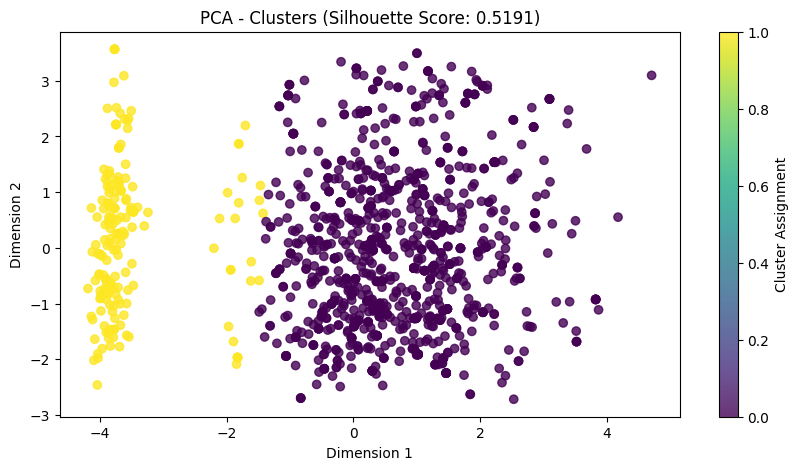

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


t-SNE Silhouette Score: 0.3720


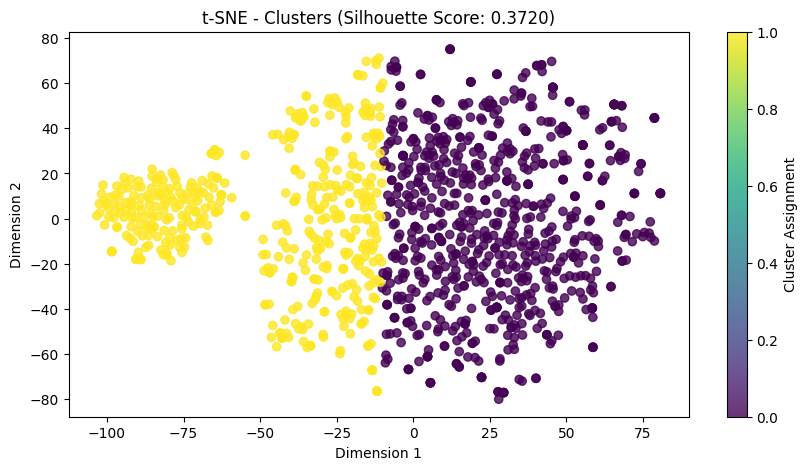

In [38]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_and_evaluate_clusters(algorithm, data, n_clusters):
    # Dimensionality reduction
    if algorithm == 'PCA':
        reducer = PCA(n_components=2)
    elif algorithm == 't-SNE':
        reducer = TSNE(n_components=2, random_state=42)
    else:
        raise ValueError("Unsupported algorithm")

    X_reduced = reducer.fit_transform(data)

    # KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_reduced)

    # Silhouette Score
    silhouette_score_value = silhouette_score(X_reduced, kmeans_labels)
    print(f"{algorithm} Silhouette Score: {silhouette_score_value:.4f}")

    # Visualization
    plt.figure(figsize=(10, 5))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.8)
    plt.title(f'{algorithm} - Clusters (Silhouette Score: {silhouette_score_value:.4f})')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar(label='Cluster Assignment')
    plt.show()

# Usage
visualize_and_evaluate_clusters('PCA', X_train_encoded, n_clusters=2)
visualize_and_evaluate_clusters('t-SNE', X_train_encoded, n_clusters=2)


## Agglomerative Clustering Visualization

PCA Silhouette Score: 0.5323


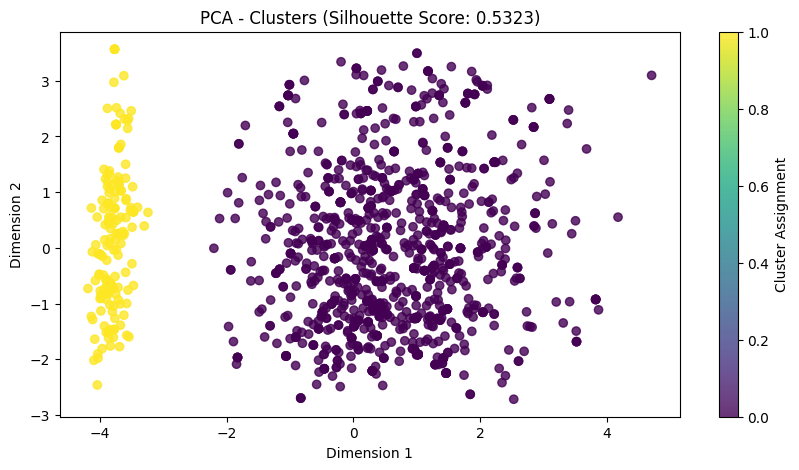

t-SNE Silhouette Score: 0.3386


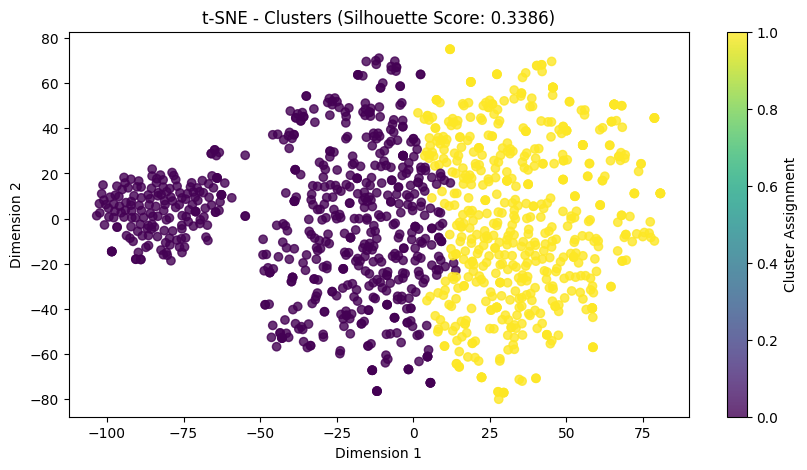

In [40]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_and_evaluate_agglomerative_clusters(algorithm, data, n_clusters):
    # Dimensionality reduction
    if algorithm == 'PCA':
        reducer = PCA(n_components=2)
    elif algorithm == 't-SNE':
        reducer = TSNE(n_components=2, random_state=42)
    else:
        raise ValueError("Unsupported algorithm")

    X_reduced = reducer.fit_transform(data)

    # Agglomerative clustering
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    ag_labels = agglomerative.fit_predict(X_reduced)

    # Silhouette Score
    silhouette_score_value = silhouette_score(X_reduced, ag_labels)
    print(f"{algorithm} Silhouette Score: {silhouette_score_value:.4f}")

    # Visualization
    plt.figure(figsize=(10, 5))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=ag_labels, cmap='viridis', alpha=0.8)
    plt.title(f'{algorithm} - Clusters (Silhouette Score: {silhouette_score_value:.4f})')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar(label='Cluster Assignment')
    plt.show()

# Usage
visualize_and_evaluate_agglomerative_clusters('PCA', X_train_encoded, n_clusters=2)
visualize_and_evaluate_agglomerative_clusters('t-SNE', X_train_encoded, n_clusters=2)


## DB-Scan Visualization

PCA Silhouette Score: 0.3885


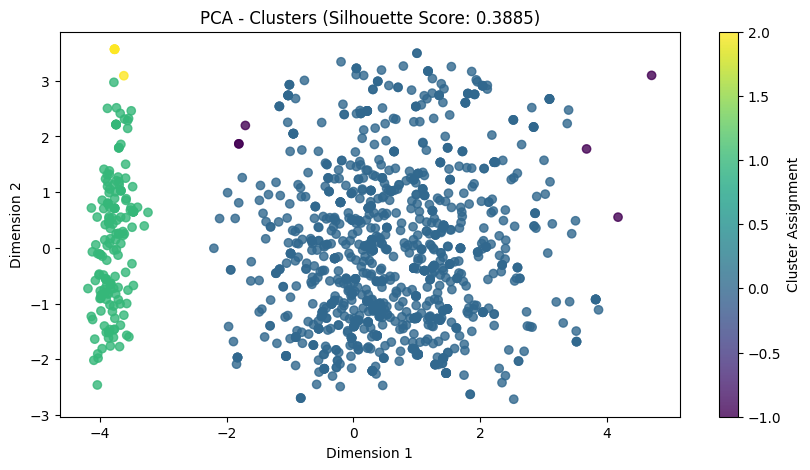

t-SNE Silhouette Score: -0.4388


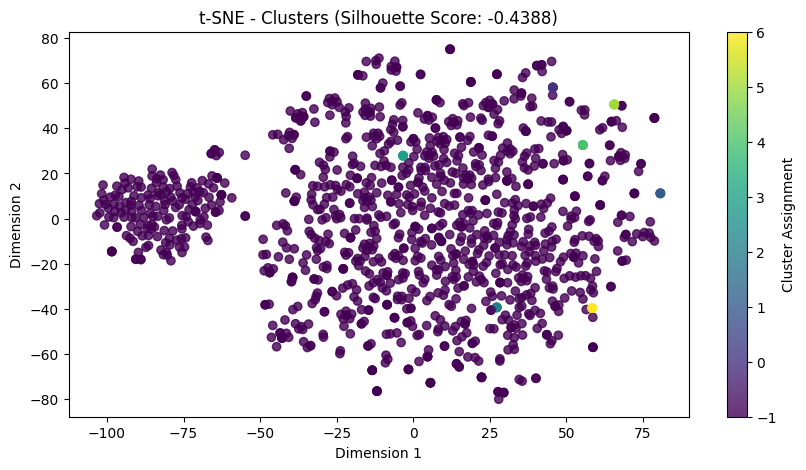

In [41]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_and_evaluate_dbscan_clusters(algorithm, data, eps, min_samples):
    # Dimensionality reduction
    if algorithm == 'PCA':
        reducer = PCA(n_components=2)
    elif algorithm == 't-SNE':
        reducer = TSNE(n_components=2, random_state=42)
    else:
        raise ValueError("Unsupported algorithm")

    X_reduced = reducer.fit_transform(data)

    # DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(X_reduced)

    # Silhouette Score
    silhouette_score_value = silhouette_score(X_reduced, dbscan_labels)
    print(f"{algorithm} Silhouette Score: {silhouette_score_value:.4f}")

    # Visualization
    plt.figure(figsize=(10, 5))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.8)
    plt.title(f'{algorithm} - Clusters (Silhouette Score: {silhouette_score_value:.4f})')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar(label='Cluster Assignment')
    plt.show()

# Usage
visualize_and_evaluate_dbscan_clusters('PCA', X_train_encoded, eps=0.5, min_samples=5)
visualize_and_evaluate_dbscan_clusters('t-SNE', X_train_encoded, eps=0.5, min_samples=5)
